In [1]:
import numpy as np
import os
import torch
import tensorflow as tf
import keras
import random
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense

In [2]:
imgL = range(5121)
imgH = 200
imgW = 200
imgC = 1

list = []
for n in imgL:
    list.append(n)
random.shuffle(list)

print(list)

[1372, 973, 4716, 2750, 122, 713, 3863, 3313, 137, 4330, 1336, 3573, 5040, 229, 3130, 64, 523, 2655, 4951, 937, 2296, 788, 5039, 3372, 2904, 857, 1814, 2399, 4090, 1520, 1618, 4143, 2153, 1619, 1951, 2586, 4788, 3218, 1965, 108, 1400, 1093, 2624, 4423, 1356, 374, 2674, 2748, 1877, 4943, 4504, 3348, 1320, 4850, 2142, 4747, 4711, 3673, 1167, 2006, 4820, 4139, 3309, 2803, 638, 1100, 679, 1740, 2370, 1713, 3388, 4959, 3903, 667, 773, 4897, 4660, 4601, 608, 3200, 4823, 1395, 1092, 4137, 2309, 3291, 367, 2457, 235, 3063, 4663, 3314, 36, 61, 2484, 3614, 4691, 2013, 1703, 978, 1203, 4858, 4712, 1807, 3682, 2412, 1822, 3808, 2270, 1666, 96, 1115, 4507, 4151, 1812, 1609, 1114, 674, 3341, 5065, 3563, 3053, 5005, 4450, 496, 1895, 694, 2692, 2324, 733, 923, 4808, 327, 2544, 617, 2339, 3259, 2592, 3068, 3908, 3479, 1365, 705, 1450, 1344, 316, 3333, 2488, 2666, 4442, 3010, 1603, 5087, 2106, 1426, 299, 3414, 4957, 1912, 3325, 1366, 1571, 1321, 430, 2085, 4265, 123, 57, 1215, 1145, 468, 1210, 3222, 837

MildDemented
ModerateDemented
NonDemented
VeryMildDemented
C:\Users\ebudy\ADDataset\adSet\train\NonDemented\nonDem1656.jpg
C:\Users\ebudy\ADDataset\adSet\train\VeryMildDemented\verymildDem1384.jpg
[0 1 0 0]


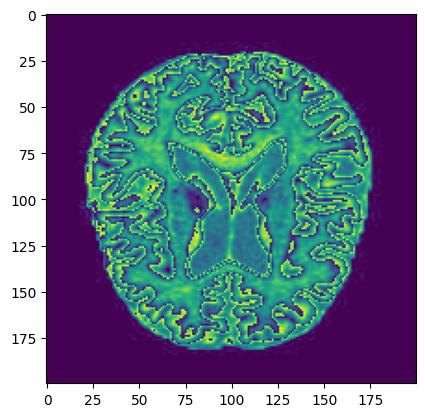

In [3]:
trainPath = r"C:\Users\ebudy\ADDataset\adSet\train"
testPath = r"C:\Users\ebudy\ADDataset\adSet\test"

trainXList = np.zeros((5121, imgH, imgW), dtype=np.uint8)
trainYList = np.zeros((5121, 4), dtype=int)
tempXList = np.zeros((5121, imgH, imgW, 3), dtype=np.uint8)
testList = np.zeros((1279, imgH, imgW), dtype=np.uint8)
tempL = np.zeros((1, imgH, imgW, 1), dtype=np.uint8)
fullList = []

for folder, n in zip(os.listdir(trainPath), imgL):
    print(folder)
    for img in os.listdir(trainPath + "\\" + folder):
        fullList.append(trainPath + "\\" + folder + "\\" + img)         

print(fullList[1500])
        
for im, n in zip(fullList, list):
    if n==150:
        print(im)
    if "Non" in im:
        trainYList[n][0] = 1
    elif "Very" in im:
        trainYList[n][1] = 1
    elif "Mild" in im:
        trainYList[n][2] = 1
    elif "Moderate" in im:
        trainYList[n][3] = 1
    im = cv2.imread(im)
    im = cv2.resize(im, (200, 200))
    tempXList[n] = im
    #l0, l1, l2 = cv2.split(tempXList[n])
    #for x in range(0, 200):
        #tempL = (l0 + l1 + l2)/3
        #trainXList[n] = tempL
        
print(trainYList[150])
plt.imshow(trainXList[150])

In [7]:
temptestList = np.zeros((1279, imgH, imgW, 3), dtype=np.uint8)
testYList = np.zeros((1279, 4), dtype=int)
fullList = []

for folder, n in zip(os.listdir(testPath), range(1279)):
    print(folder)
    for img in os.listdir(testPath + "\\" + folder):
        fullList.append(testPath + "\\" + folder + "\\" + img)
        
for im, n in zip(fullList, range(1279)):
    if "Non" in im:
        testYList[n][0] = 1
    elif "Very" in im:
        testYList[n][1] = 1
    elif "Mild" in im:
        testYList[n][2] = 1
    elif "Moderate" in im:
        testYList[n][3] = 1
    im = cv2.imread(im)
    im = cv2.resize(im, (200, 200))
    temptestList[n] = im
    #l0, l1, l2 = cv2.split(temptestList[n])
    #for x in range(0, 200):
        #tempL = (l0 + l1 + l2)/3
        #testList[n] = tempL
        
print(testYList[150])
#plt.imshow(testList[150])

MildDemented
ModerateDemented
NonDemented
VeryMildDemented
[0 0 1 0]


In [8]:
XList = np.zeros((5121, 40000), dtype=np.uint8)
testXList = np.zeros((1279, 40000), dtype=np.uint8)

for item, n in zip(trainXList, list):
    XList[n] = item.flatten()
    XList[n] = XList[n]/255
    
#for item, n in zip(testList, range(1279)):
    #testXList[n] = item.flatten()
    #testXList[n] = testXList[n]/255

In [49]:
def conv_block(numfilters, padding='same'):
    model_cb = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=numfilters, kernel_size=3, strides=1, padding=padding, activation='relu'),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.MaxPooling2D(pool_size=2)
    ])
    return model_cb

def dense_block(numunits):
    model_db = tf.keras.Sequential([
        tf.keras.layers.Dense(numunits, activation='relu'),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dropout(rate=0.2)
    ])
    return model_db

model_sequential = tf.keras.Sequential([
    tf.keras.layers.Input((200, 200, 3)),
    conv_block(16),
    conv_block(32),
    conv_block(64),
    conv_block(128),
    conv_block(256),
    dense_block(128),
    dense_block(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4, activation='sigmoid',name='output-layer')
])
model_sequential.summary()

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_146 (Sequential)  (None, 100, 100, 16)     512       
                                                                 
 sequential_147 (Sequential)  (None, 50, 50, 32)       4768      
                                                                 
 sequential_148 (Sequential)  (None, 25, 25, 64)       18752     
                                                                 
 sequential_149 (Sequential)  (None, 12, 12, 128)      74368     
                                                                 
 sequential_150 (Sequential)  (None, 6, 6, 256)        296192    
                                                                 
 sequential_151 (Sequential)  (None, 6, 6, 128)        33408     
                                                                 
 sequential_152 (Sequential)  (None, 6, 6, 64)      

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('adClassification.png', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')
]

model_sequential.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results = model_sequential.fit(tempXList, trainYList, batch_size=100, epochs=3)

In [8]:
preds_train = kerasMod.predict(XList, verbose=1)
preds_val = kerasMod.predict(XList, verbose=1)
preds_test = kerasMod.predict(testXList, verbose=1)

misclassified=np.where(testYList!=preds_test)
print(misclassified)
print(len(misclassified[0]))

40/40 [==============================] - 0s 6ms/step
(array([   0,    0,    0, ..., 1278, 1278, 1278], dtype=int64), array([0, 1, 2, ..., 1, 2, 3], dtype=int64))
5116
